# US Superstore Sales Analysis - Exploratory Data Analysis (EDA)

In [44]:
# import libraries & load clean data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
df = pd.read_csv("../data/processed/cleaned_sales.csv")

### 1. Dataset Overview

This section provides a summary of the cleaned dataset from `02_data_cleaning.ipynb`, including its size, structure, and key variables.

In [46]:
df.shape

(185916, 15)

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Month_Name,Day,Weekday,Hour,City,State
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,April,19,Friday,8,Dallas,TX
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,April,7,Sunday,22,Boston,MA
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,April,12,Friday,14,Los Angeles,CA
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,April,12,Friday,14,Los Angeles,CA
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,April,30,Tuesday,9,Los Angeles,CA


In [48]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Sales,Year,Month,Day,Hour
count,185916.000000,185916.000000,185916.000000,185916.000000,185916.0,185916.000000,185916.000000,185916.000000
mean,230403.546526,1.124368,184.387720,185.478203,2019.0,7.060248,15.762231,14.415661
std,51506.924899,0.442749,332.722426,332.911130,0.0,3.502358,8.780711,5.421069
min,141234.000000,1.000000,2.990000,2.990000,2019.0,1.000000,1.000000,0.000000
25%,185822.750000,1.000000,11.950000,11.950000,2019.0,4.000000,8.000000,11.000000
50%,230351.500000,1.000000,14.950000,14.950000,2019.0,7.000000,16.000000,15.000000
75%,275015.250000,1.000000,150.000000,150.000000,2019.0,10.000000,23.000000,19.000000
max,319670.000000,9.000000,1700.000000,3400.000000,2019.0,12.000000,31.000000,23.000000


### 2. Overall Sales Performance

I'll begin by analyzing total revenue, total order volume, and overall business performance.


In [49]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
total_quantity = df['Quantity Ordered'].sum()

total_sales, total_orders, total_quantity


(np.float64(34483365.68), 178406, np.float64(209038.0))

### 3. Monthly Sales Trends

I'll examine how sales performance changes across months to identify seasonality and growth patterns.


In [50]:
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales


Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

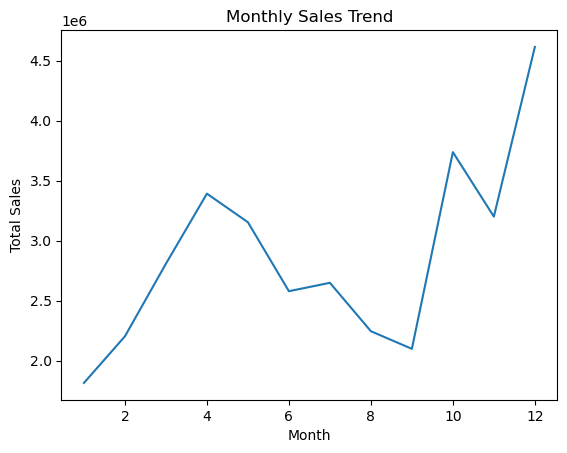

In [51]:
# lets see want it looks like visually

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


### 4. Sales by Product

This section identifies top-performing and underperforming products based on revenue and order volume.


In [52]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

product_sales.head(10)

Product
Macbook Pro Laptop            8035900.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3318600.00
27in 4K Gaming Monitor        2434707.57
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2348550.00
Flatscreen TV                 1445400.00
Bose SoundSport Headphones    1345265.46
27in FHD Monitor              1131974.53
Name: Sales, dtype: float64

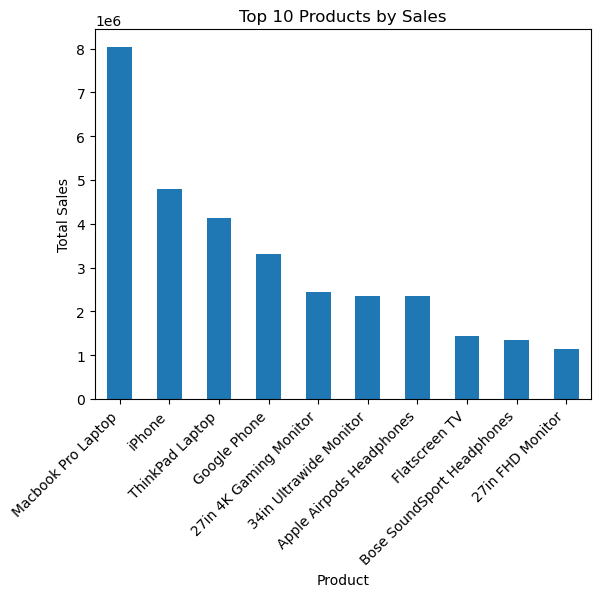

In [53]:
# lets also visualize top 10 products by sales

top_products = product_sales.head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()


### 5. Sales by Location

I'll analyze sales performance across cities and states to understand geographic demand patterns.

In [54]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

city_sales.head(10), state_sales


(City
 San Francisco    8259719.03
 Los Angeles      5451570.81
 New York City    4662976.81
 Boston           3660315.12
 Atlanta          2795498.58
 Dallas           2766260.45
 Seattle          2747605.49
 Portland         2320337.62
 Austin           1819081.77
 Name: Sales, dtype: float64,
 State
 CA    13711289.84
 NY     4662976.81
 TX     4585342.22
 MA     3660315.12
 GA     2795498.58
 WA     2747605.49
 OR     1870579.35
 ME      449758.27
 Name: Sales, dtype: float64)

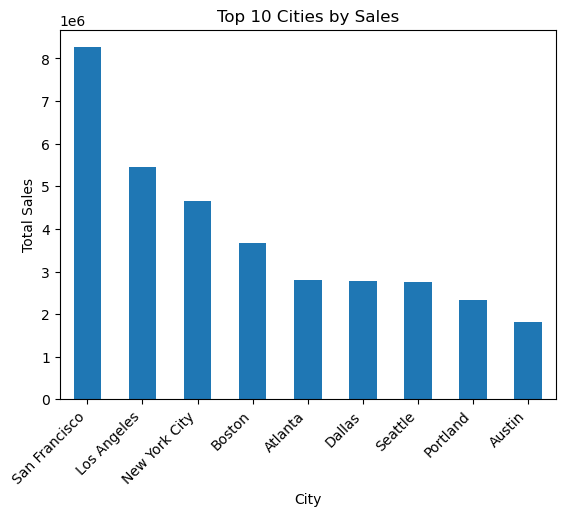

In [55]:
plt.figure()
city_sales.head(10).plot(kind='bar')
plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()

### 6. Time-Based Purchasing Patterns

i'll analyze how purchasing behavior varies by hour of the day and day of the week.

In [56]:
hourly_sales = df.groupby('Hour')['Sales'].sum()
weekday_sales = df.groupby('Weekday')['Sales'].sum()

hourly_sales, weekday_sales


(Hour
 0      711060.59
 1      458561.97
 2      232586.50
 3      144697.99
 4      162396.09
 5      230564.88
 6      448113.00
 7      744854.12
 8     1192348.97
 9     1639030.58
 10    1944286.77
 11    2300610.24
 12    2316821.34
 13    2155389.80
 14    2083672.73
 15    1941549.60
 16    1904601.31
 17    2129361.61
 18    2219348.30
 19    2412938.54
 20    2281716.24
 21    2042000.86
 22    1607549.21
 23    1179304.44
 Name: Sales, dtype: float64,
 Weekday
 Friday       4855938.38
 Monday       4883326.72
 Saturday     4904357.01
 Sunday       4932169.66
 Thursday     4839465.16
 Tuesday      5087956.78
 Wednesday    4980151.97
 Name: Sales, dtype: float64)

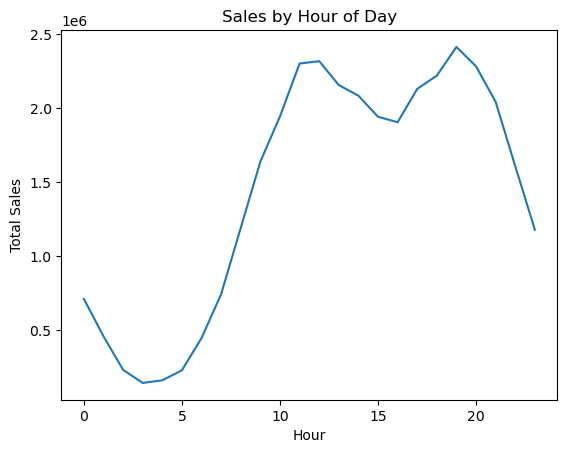

In [57]:
# lets take a look

plt.figure()
hourly_sales.plot()
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

### 7. Product and Seasonal Interaction

Here we will explore how product performance changes across different months to uncover seasonal product demand.


In [58]:
product_month_sales = df.groupby(['Product', 'Month'])['Sales'].sum().unstack()

product_month_sales.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
20in Monitor,23647.85,27057.54,35856.74,43226.07,37506.59,35416.78,35966.73,28707.39,30467.23,47185.71,46195.80,62584.31
27in 4K Gaming Monitor,121676.88,166525.73,186805.21,220734.34,211374.58,175885.49,188365.17,171595.60,148586.19,281962.77,224244.25,336951.36
27in FHD Monitor,62845.81,71245.25,91193.92,110392.64,103343.11,85044.33,91043.93,73645.09,72445.17,118642.09,107842.81,144290.38
34in Ultrawide Monitor,119316.86,158835.82,198354.78,248513.46,206714.56,172895.45,175555.38,144396.20,144016.21,254973.29,209374.49,322611.51
AA Batteries (4-pack),5468.16,6662.40,8509.44,10832.64,9154.56,8048.64,7952.64,7019.52,6800.64,11289.60,10080.00,14300.16


### 8. Revenue Concentration

Here i want to assess whether a small subset of products contributes disproportionately to total revenue.

In [59]:
product_sales_sorted = product_sales.sort_values(ascending=False)
cumulative_revenue = product_sales_sorted.cumsum() / product_sales_sorted.sum()

cumulative_revenue.head(10)

Product
Macbook Pro Laptop            0.233037
iPhone                        0.372029
ThinkPad Laptop               0.491737
Google Phone                  0.587975
27in 4K Gaming Monitor        0.658580
34in Ultrawide Monitor        0.726890
Apple Airpods Headphones      0.794997
Flatscreen TV                 0.836913
Bose SoundSport Headphones    0.875925
27in FHD Monitor              0.908752
Name: Sales, dtype: float64

### Quantity Ordered vs Price

This section explores the relationship between product price and the quantity ordered to understand whether revenue is driven by high-volume low-price items or low-volume high-price items.

C:\Users\Grace\AppData\Local\Temp\ipykernel_26468\4140231352.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_summary.index, rotation=45, ha='right', fontsize=10)


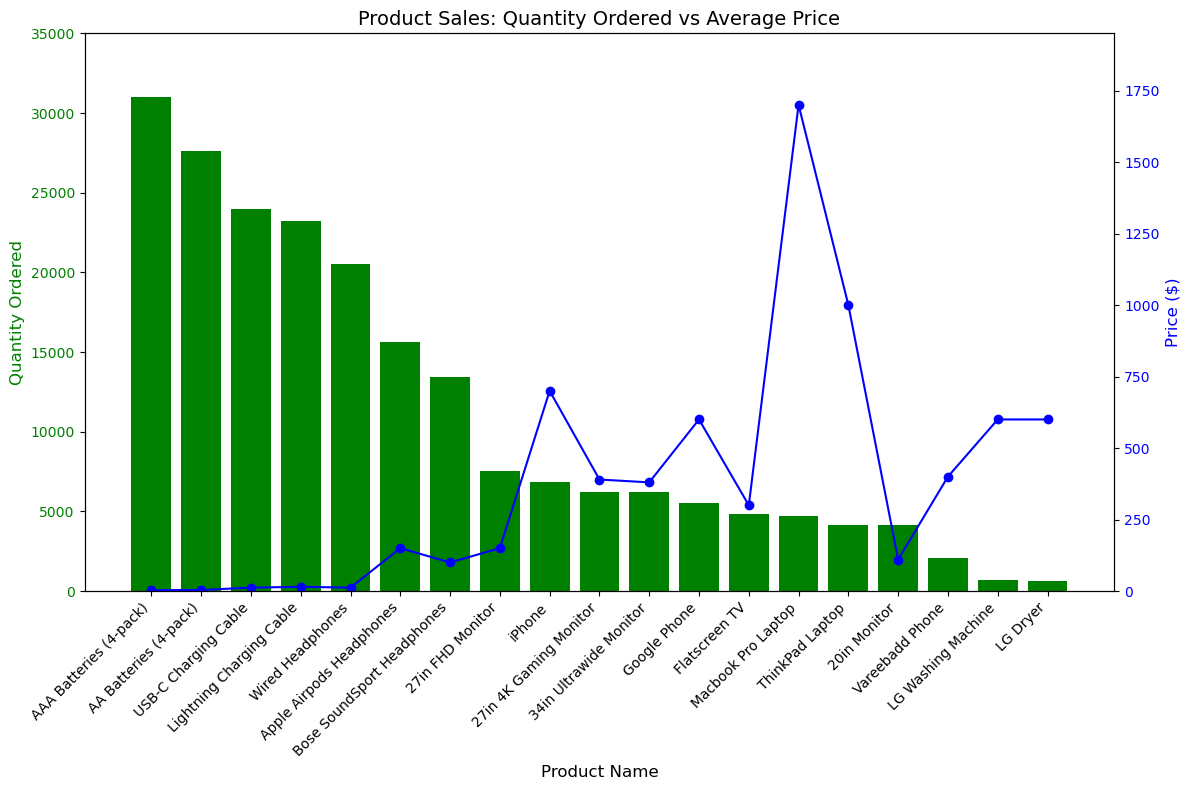

In [63]:
product_summary = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).sort_values('Quantity Ordered', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 8))  # Increase height for vertical space

# --- Bar chart for quantity (Left Y-axis) ---
ax1.bar(product_summary.index, product_summary['Quantity Ordered'], color='green')
ax1.set_xlabel('Product Name', fontsize=12)
ax1.set_ylabel('Quantity Ordered', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 35000)  # Give headroom above tallest bar
ax1.grid(False)

# --- Line chart for price (Right Y-axis) ---
ax2 = ax1.twinx()
ax2.plot(product_summary.index, product_summary['Price Each'], color='blue', marker='o')
ax2.set_ylabel('Price ($)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 1950)

# --- General plot customizations ---
plt.title('Product Sales: Quantity Ordered vs Average Price', fontsize=14)
ax1.set_xticklabels(product_summary.index, rotation=45, ha='right', fontsize=10)
fig.tight_layout()
plt.show()

# Finally a nice chart 

This analysis shows a clear tradeoff between price and volume. Low-cost items such as batteries and charging cables are purchased in very high quantities but contribute relatively little to total revenue. In contrast, premium products like laptops and smartphones are ordered less frequently but generate the majority of revenue due to their high price points.

This confirms that business performance is driven more by high-value items than by high-volume accessories.

## 2019 Sales Performance Summary

### Overall Business Performance

In 2019, the business generated \\$34.5 million in revenue from over 178,000 orders and sold more than 209,000 individual items. This confirms a high-volume, fast-moving operation with consistent customer demand throughout the year.

---

### Sales Trends Over Time

Sales increased steadily as the year progressed, with the strongest performance occurring during the holiday season. Revenue grew from about \\$1.8M in January and climbed sharply toward the end of the year, peaking in December at \\$4.6M. This clearly shows that Q4 is the most critical revenue period, driven largely by holiday demand.

---

### Top Products and Markets

A small group of high-ticket electronics drives most of the company’s revenue. The MacBook Pro Laptop alone generated over $8M, followed by the iPhone and the ThinkPad Laptop. These three products form the financial backbone of the business.

Geographically, California dominates. San Francisco and Los Angeles together account for a large portion of total sales, and California’s overall revenue far exceeds all other states. This suggests the West Coast is the company’s strongest and most valuable market.

---

### Customer Purchasing Behavior

Customers tend to shop most during late mornings and evenings, with peaks around 12 PM and 7 PM. This aligns well with lunch breaks and after-work hours.

Sales remain remarkably consistent across the week, with only minor variation between days. This indicates stable daily demand rather than reliance on specific weekdays.

---

### Seasonal Product Demand

Certain products show strong seasonal patterns. Large electronics such as monitors and laptops experience sharp spikes in December, likely driven by holiday gifting. Even low-cost accessories like batteries see noticeable increases during this period, reflecting increased electronics purchases overall.

---

### Revenue Concentration

Revenue is heavily concentrated in a small number of products. The top product alone contributes about 23% of total revenue, and the top ten products together generate roughly 90% of all sales. This creates both opportunity and risk: performance depends heavily on a narrow set of products.
